<h1 style="text-align: center; color: RED">DİYABET VERİ SETİ İÇİN FEATURE ENGİNEERİNG</h1>

<span style="color: blue; font-weight: bold;">İŞ PROBLEMİ</span>

Özellikleri belirtildiğinde kişilerin diyabet hastası olup olmadıklarını tahmin
edebilecek bir makine öğrenmesi modeli geliştirilmesi istenmektedir. Modeli
geliştirmeden önce gerekli olan veri analizi ve özellik mühendisliği adımlarını
gerçekleştirmeniz beklenmektedir.

<span style="color: blue; font-weight: bold;">VERİ SETİ HİKAYESİ</span>

Veri seti ABD'deki Ulusal Diyabet-Sindirim-Böbrek Hastalıkları Enstitüleri'nde tutulan büyük veri setinin parçasıdır. ABD'deki
Arizona Eyaleti'nin en büyük 5. şehri olan Phoenix şehrinde yaşayan 21 yaş ve üzerinde olan Pima Indian kadınları üzerinde
yapılan diyabet araştırması için kullanılan verilerdir.
Hedef değişken "outcome" olarak belirtilmiş olup; 1 diyabet test sonucunun pozitif oluşunu, 0 ise negatif oluşunu belirtmektedir.

9 Değişken 768 Gözlem 24 KB

Pregnancies: Hamilelik sayısı

Glucose Oral: glikoz tolerans testinde 2 saatlik plazma glikoz konsantrasyonu

Blood Pressure: Kan Basıncı (Küçük tansiyon) (mm Hg)

SkinThickness: Cilt Kalınlığı

Insulin: 2 saatlik serum insülini (mu U/ml)

DiabetesPedigreeFunction: Fonksiyon (Oral glikoz tolerans testinde 2 saatlik plazma glikoz konsantrasyonu)

BMI:Vücut kitle endeksi

Age: Yaş (yıl)

Outcome: Hastalığa sahip (1) ya da değil (0)

<h2 style="text-align: center; color: RED">PROJE GÖREVLERİ</h2>

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno #eksik değerler için kullanılan bir kütüphane
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

#Görsel ayaralama için
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

<span style="color: blue; font-weight: bold;">Görev 1 : Keşifçi Veri Analizi</span>

**Adım 1:** Genel resmi inceleyiniz.

In [319]:
df = pd.read_csv("C:\\Users\\ASLI\\Desktop\\Data Scientist Bootcamp\\6.Feature Engineering\\datasets\\diabetes.csv")

In [233]:
def check_df(dataframe, head = 5):
    print('##############SHAPE##############')
    print(dataframe.shape)
    print('##############TYPES##############')
    print(dataframe.dtypes)
    print('##############COLUMNS#####################')
    print(dataframe.columns)
    print('##############HEAD######################')
    print(dataframe.head(head))
    print('##############TAİL#####################')
    print(dataframe.tail(head))
    print('##############DESCRİBE##########################')
    print(dataframe.describe([0, 0.05,0.25, 0.50,0.75, 0.95, 0.99, 1]).T)
    print('##############NULL#####################')
    print(dataframe.isnull().sum())
check_df(df)

##############SHAPE##############
(768, 9)
##############TYPES##############
Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object
##############COLUMNS#####################
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], dtype='object')
##############HEAD######################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction    Age  Outcome
0            6  148.000         72.000         35.000      NaN 33.600                     0.627 50.000        1
1            1   85.000         66.000         29.000      NaN 26.600                     0.351 31.000        0
2            8  1

**Adım 2:** Numerik ve kategorik değişkenleri yakalayınız.

In [22]:
def grab_col_names(dataframe, cat_th=10, car_th=20):#parametrelerin ön tanımlı değerlerini burda belirttik

    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ['object', 'category', 'bool']]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtypes in ['int64', 'float64'] and dataframe[col].nunique() < cat_th]
    cat_but_car = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ['object', 'category'] and dataframe[col].nunique() > car_th]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car] 

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes  in ['int64', 'float64']] #bu sayısal değişkenleri verir
    num_cols = [col for col in num_cols if col not in cat_cols] 

    print(f'Observetions: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [30]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [321]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observetions: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [36]:
cat_cols

['Outcome']

**Adım 3:** Numerik ve kategorik değişkenlerin analizini yapınız.

In [47]:
def cat_summary(dataframe, col_name, plot = False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                  'Ratio':100 * dataframe[col_name].value_counts() / dataframe.shape[0]}))
    print('###################################')

    if plot:
        sns.countplot(data=dataframe, x = dataframe[col_name])
        plt.show()


         Outcome  Ratio
Outcome                
0            500 65.104
1            268 34.896
###################################


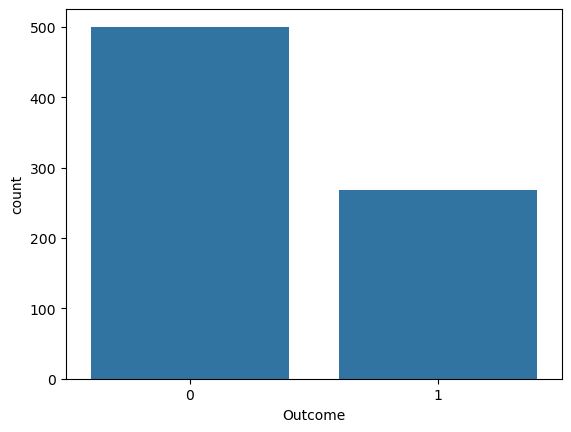

In [49]:
for col in cat_cols:
    cat_summary(df, col, plot = True)

* Veri Outcome değişkenindeki sınıf sayısına baktığımızda çok olmasada   dengesiz bir veri dağılımı var diyebiliriz.

In [76]:
def num_summary(dataframe, col_name, plot = False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.99 ]
    print(dataframe[col_name].describe(quantiles)) #sayısal değişkenlerin betimsel istatistikleri
    print('################################')

    if plot:
        plt.figure(figsize=(8, 4))
        sns.histplot(data=dataframe, x=col_name, kde=True)
        plt.title(f"{col_name} Dağılımı")
        plt.show()

count   768.000
mean      3.845
std       3.370
min       0.000
5%        0.000
10%       0.000
20%       1.000
30%       1.000
40%       2.000
50%       3.000
60%       4.000
70%       5.000
80%       7.000
90%       9.000
99%      13.000
max      17.000
Name: Pregnancies, dtype: float64
################################


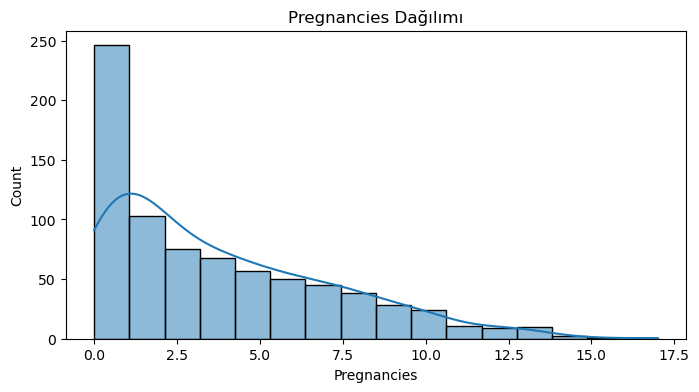

count   768.000
mean    120.895
std      31.973
min       0.000
5%       79.000
10%      85.000
20%      95.000
30%     102.000
40%     109.000
50%     117.000
60%     125.000
70%     134.000
80%     147.000
90%     167.000
99%     196.000
max     199.000
Name: Glucose, dtype: float64
################################


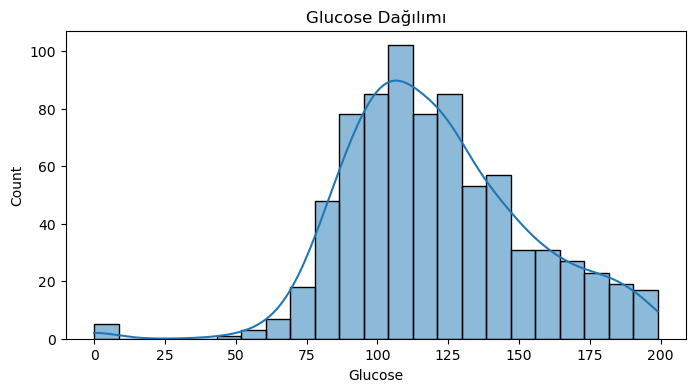

count   768.000
mean     69.105
std      19.356
min       0.000
5%       38.700
10%      54.000
20%      60.000
30%      64.000
40%      68.000
50%      72.000
60%      74.000
70%      78.000
80%      82.000
90%      88.000
99%     106.000
max     122.000
Name: BloodPressure, dtype: float64
################################


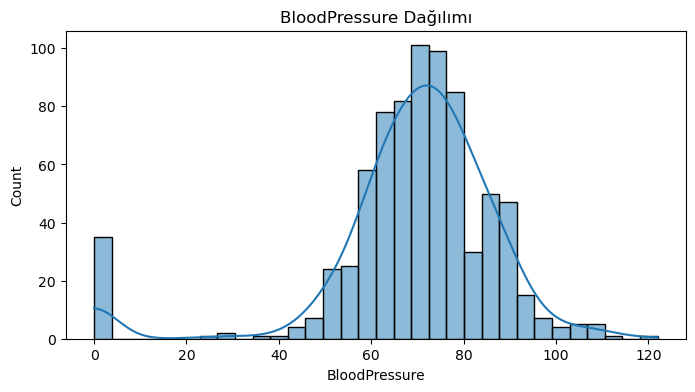

count   768.000
mean     20.536
std      15.952
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       8.200
40%      18.000
50%      23.000
60%      27.000
70%      31.000
80%      35.000
90%      40.000
99%      51.330
max      99.000
Name: SkinThickness, dtype: float64
################################


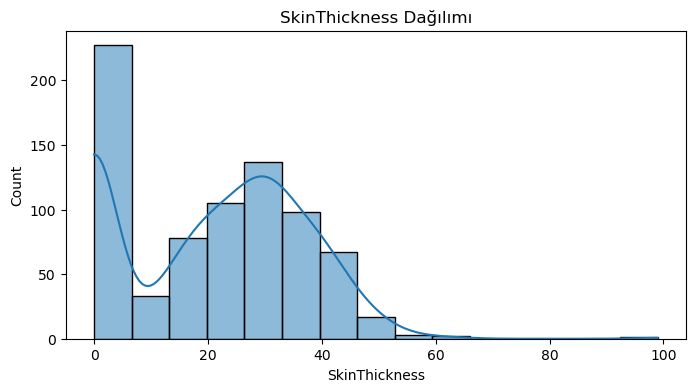

count   768.000
mean     79.799
std     115.244
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%      30.500
60%      72.200
70%     106.000
80%     150.000
90%     210.000
99%     519.900
max     846.000
Name: Insulin, dtype: float64
################################


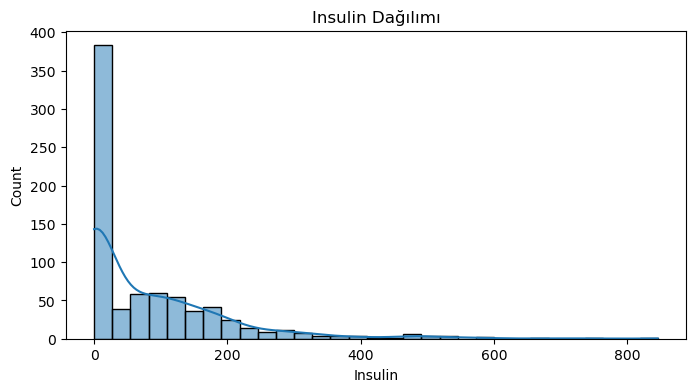

count   768.000
mean     31.993
std       7.884
min       0.000
5%       21.800
10%      23.600
20%      25.900
30%      28.200
40%      30.100
50%      32.000
60%      33.700
70%      35.490
80%      37.800
90%      41.500
99%      50.759
max      67.100
Name: BMI, dtype: float64
################################


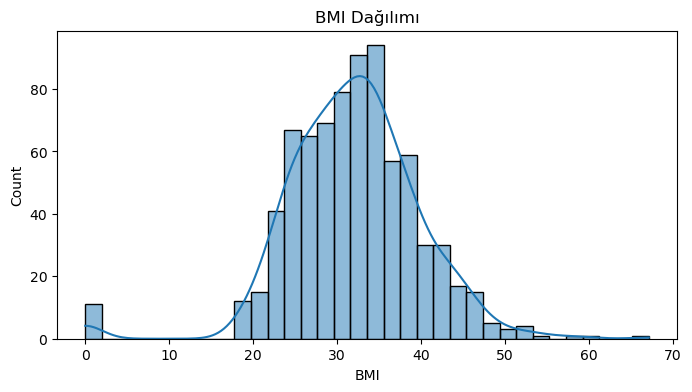

count   768.000
mean      0.472
std       0.331
min       0.078
5%        0.140
10%       0.165
20%       0.219
30%       0.259
40%       0.303
50%       0.372
60%       0.454
70%       0.564
80%       0.687
90%       0.879
99%       1.698
max       2.420
Name: DiabetesPedigreeFunction, dtype: float64
################################


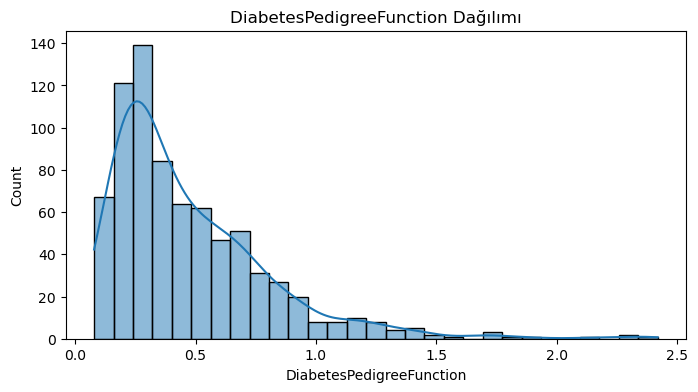

count   768.000
mean     33.241
std      11.760
min      21.000
5%       21.000
10%      22.000
20%      23.000
30%      25.000
40%      27.000
50%      29.000
60%      33.000
70%      38.000
80%      42.600
90%      51.000
99%      67.000
max      81.000
Name: Age, dtype: float64
################################


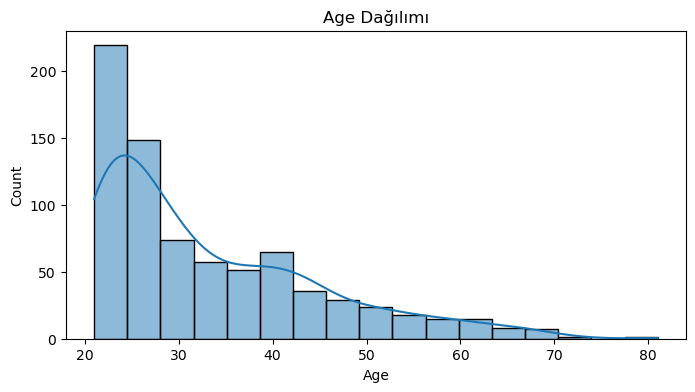

In [78]:
for col in num_cols:
    num_summary(df, col, plot = True)

**Adım 4:** Hedef değişken analizi yapınız. (Kategorik değişkenlere göre hedef değişkenin ortalaması, hedef değişkene göre
numerik değişkenlerin ortalaması)

In [81]:
def target_summary_with_num(dataframe, target, num_col):
    print(dataframe.groupby(target).agg({num_col:'mean'}))

In [83]:
for col in num_cols:
    target_summary_with_num(df, df['Outcome'], col)

         Pregnancies
Outcome             
0              3.298
1              4.866
         Glucose
Outcome         
0        109.980
1        141.257
         BloodPressure
Outcome               
0               68.184
1               70.825
         SkinThickness
Outcome               
0               19.664
1               22.164
         Insulin
Outcome         
0         68.792
1        100.336
           BMI
Outcome       
0       30.304
1       35.143
         DiabetesPedigreeFunction
Outcome                          
0                           0.430
1                           0.550
           Age
Outcome       
0       31.190
1       37.067


**Adım 5:** Aykırı gözlem analizi yapınız.

* Sayısal değişkenlerin betimsel istatistiklerine baktığımda aykırı değer yok gibi görünüyor.Ama biz yine de ucundan veri setini yapsını bozmadan aykırı değerlere bakıp baskılayalım

In [205]:
def outlier_tresholds(dataframe, col_name, q1=0.05, q3=0.95):
    q1 = dataframe[col_name].quantile(q1)
    q3 = dataframe[col_name].quantile(q3)
    IQR = q3 -q1
    up_limit = q3 + 1.5*IQR
    low_limit = q1 - 1.5*IQR
    return low_limit, up_limit

In [323]:
def check_outliers(dataframe, col_name):
    low_limit, up_limit = outlier_tresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] < low_limit)|(dataframe[col_name] > up_limit)].any(axis=None):
        return True
    else:
        return False

In [325]:
for col in num_cols:
    print(col,check_outliers(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin True
BMI False
DiabetesPedigreeFunction False
Age False


**Adım 6:** Eksik gözlem analizi yapınız.

In [135]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

* Veri setinde eksik değer görünümüyor fakat bazı değişkenlerde 0 değeri var. Hamilelikte ve hedef değişkende 0 olabilir. Fakat cilt kalınlığı, glikoz değerinin sıfır olması pek mümkün değildir.Bu sebeple 0 olan bu değerleri eksik değer olarak kabul edebiliriz.

**Adım 7:** Korelasyon analizi yapınız.

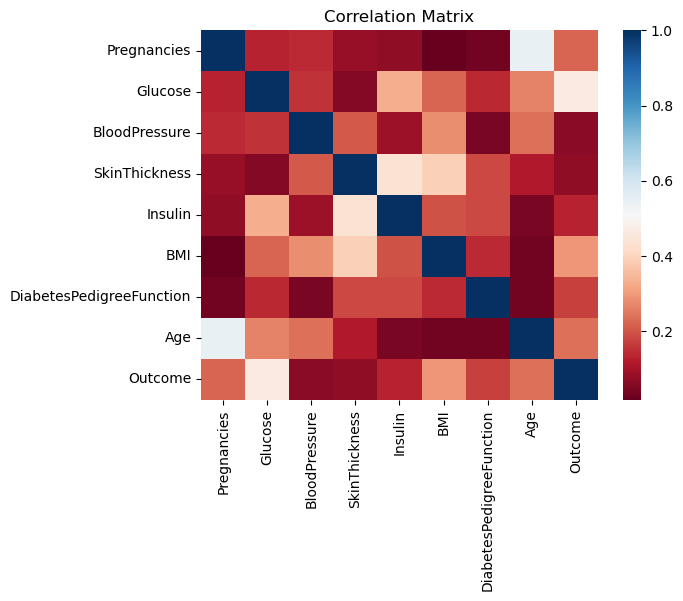

[]

In [143]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr_matrix = dataframe.select_dtypes(include='number').corr().abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.heatmap(corr_matrix, cmap="RdBu", annot=False)
        plt.title("Correlation Matrix")
        plt.show()

    return drop_list

drop_list = high_correlated_cols(df, plot=True)
drop_list

* Birbiri ile yüksek korelasyonlu değişken yok.

* Belirlediğimiz eşik değer için Insulin değişkeninde aykırı değer var gözünüyor.Bu aykırı değeri baskılayalım.

<span style="color: blue; font-weight: bold;"> Görev 2 : Feature Engineering</span>

**Adım 1:** Eksik ve aykırı değerler için gerekli işlemleri yapınız. Veri setinde eksik gözlem bulunmamakta ama Glikoz, Insulin vb.
değişkenlerde 0 değeri içeren gözlem birimleri eksik değeri ifade ediyor olabilir. Örneğin; bir kişinin glikoz veya insulin değeri 0
olamayacaktır. Bu durumu dikkate alarak sıfır değerlerini ilgili değerlerde NaN olarak atama yapıp sonrasında eksik
değerlere işlemleri uygulayabilirsiniz.

In [327]:
#aykırı değeri baskılama
def replace_with_thresholds(dataframe, col_name):
    low_limit, up_limit = outlier_tresholds(dataframe, col_name)
    dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
    dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit

In [329]:
replace_with_thresholds(df, 'Insulin')

C:\Users\ASLI\AppData\Local\Temp\ipykernel_9684\2569428398.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-439.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit


In [331]:
for col in num_cols:
    print(col,check_outliers(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False


In [162]:
df['Insulin'].describe()

count   768.000
mean     79.637
std     114.243
min       0.000
25%       0.000
50%      30.500
75%     127.250
max     732.500
Name: Insulin, dtype: float64

In [333]:
#Eksik Değer
nan_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [219]:
df[df['Glucose'] ==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0.000,24.700,0.140,22,0
182,1,0,74,20,23.000,27.700,0.299,21,0
342,1,0,68,35,0.000,32.000,0.389,22,0
349,5,0,80,32,0.000,41.000,0.346,37,1
502,6,0,68,41,0.000,39.000,0.727,41,1


In [335]:
for col in nan_list:
    df[col]=df[col].where(df[col] >0)

In [337]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [225]:
#Başka bir yöntem
for col in nan_list:
    df[col] = np.where(df[col] == 0, np.nan, df[col])

* Bu eksik değerleri analiz edelim

In [339]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

na_columns = missing_values_table(df, na_name=True)

               n_miss  ratio
Insulin           374 48.700
SkinThickness     227 29.560
BloodPressure      35  4.560
BMI                11  1.430
Glucose             5  0.650


In [341]:
na_columns

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [343]:
for col in na_columns:
    df[col]=df[col].fillna(df[col].median())

In [237]:
na_columns = missing_values_table(df, na_name=True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [239]:
df[num_cols].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,121.656,72.387,29.108,140.509,32.455,0.472,33.241
std,3.370,30.438,12.097,8.791,85.159,6.875,0.331,11.760
min,0.000,44.000,24.000,7.000,14.000,18.200,0.078,21.000
25%,1.000,99.750,64.000,25.000,121.500,27.500,0.244,24.000
50%,3.000,117.000,72.000,29.000,125.000,32.300,0.372,29.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000
max,17.000,199.000,122.000,99.000,732.500,67.100,2.420,81.000


**Adım 2:** Yeni değişkenler oluşturunuz.

In [345]:
df.loc[df['Age']<=18,'NEW_AGE_CAT']='GENC'
df.loc[(df['Age']>18) &(df['Age']<=50),'NEW_AGE_CAT']='YETISKIN'
df.loc[(df['Age']>50) ,'NEW_AGE_CAT']='YASLI'

In [347]:
df.loc[df['BMI']<=18.5,'NEW_BMI_CAT']='ZAYIF'
df.loc[(df['BMI']>18.5) &(df['BMI']<=24.39),'NEW_BMI_CAT']='NORMAL'
df.loc[(df['BMI']>24.39) &(df['BMI']<=29.9),'NEW_BMI_CAT']='KILOLU'
df.loc[(df['BMI']>=30) ,'NEW_BMI_CAT']='OBEZ'

In [349]:
df['PREGNANCIES_WITH_INSULIN'] = df['Pregnancies'] * df['Insulin']

In [351]:
df['GLUCOSE_WITH_INSULIN'] = df['Glucose'] * df['Insulin']

In [353]:
df['SKIN_WITH_INSULIN'] = df['SkinThickness'] * df['Insulin']

In [355]:
df["NEW_GLUCOSE"] = pd.cut(x=df["Glucose"], bins=[0, 140, 200, 300],
                           labels=["Normal", "Prediabetes", "Diabetes"])

In [357]:
def set_insulin(dataframe, col_name="Insulin"):
    if 16 <= dataframe[col_name] <= 166:
        return "Normal"
    else:
        return "Abnormal"

df["NEW_INSULIN_SCORE"] = df.apply(set_insulin, axis=1)

In [359]:
df.loc[(df["BMI"] < 18.5) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "underweightmature"
df.loc[(df["BMI"] < 18.5) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "underweightsenior"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "healthymature"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "healthysenior"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "overweightmature"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "overweightsenior"
df.loc[(df["BMI"] > 18.5) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "obesemature"
df.loc[(df["BMI"] > 18.5) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "obesesenior"

In [388]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observetions: 768
Variables: 20
cat_cols: 6
num_cols: 11
cat_but_car: 0
num_but_cat: 1


In [363]:
df.columns = [col.upper() for col in df.columns]

In [365]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_BMI_CAT,PREGNANCIES_WITH_INSULIN,GLUCOSE_WITH_INSULIN,SKIN_WITH_INSULIN,NEW_GLUCOSE,NEW_INSULIN_SCORE,NEW_AGE_BMI_NOM
0,6,148.000,72.000,35.000,125.000,33.600,0.627,50,1,YETISKIN,OBEZ,750.000,18500.000,4375.000,Prediabetes,Normal,obesesenior
1,1,85.000,66.000,29.000,125.000,26.600,0.351,31,0,YETISKIN,KILOLU,125.000,10625.000,3625.000,Normal,Normal,obesemature
2,8,183.000,64.000,29.000,125.000,23.300,0.672,32,1,YETISKIN,NORMAL,1000.000,22875.000,3625.000,Prediabetes,Normal,obesemature
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,YETISKIN,KILOLU,94.000,8366.000,2162.000,Normal,Normal,obesemature
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,YETISKIN,OBEZ,0.000,23016.000,5880.000,Normal,Abnormal,obesemature


**Adım 3:** Encoding işlemlerini gerçekleştiriniz.

In [367]:
binary_cols = [col for col in df.columns if df[col].dtype not in ['int64','float64','int32','float32'] and df[col].nunique() ==2]

In [369]:
binary_cols

['NEW_AGE_CAT', 'NEW_GLUCOSE', 'NEW_INSULIN_SCORE']

In [371]:
#İki sınıflı olanlar için
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[col] = labelencoder.fit_transform(dataframe[col])
    return dataframe

In [373]:
for col in binary_cols:
    df = label_encoder(df, col)

In [279]:
#Çok sınıflı  ve işimize yaramyacak değişkenleri analiz edelim
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [283]:
rare_analyser(df, "OUTCOME", cat_cols)

NEW_AGE_CAT : 2
             COUNT  RATIO  TARGET_MEAN
NEW_AGE_CAT                           
YASLI           81  0.105        0.469
YETISKIN       687  0.895        0.335


NEW_BMI_CAT : 4
             COUNT  RATIO  TARGET_MEAN
NEW_BMI_CAT                           
KILOLU         196  0.255        0.209
NORMAL          85  0.111        0.071
OBEZ           483  0.629        0.458
ZAYIF            4  0.005        0.000


NEW_GLUCOSE : 3
             COUNT  RATIO  TARGET_MEAN
NEW_GLUCOSE                           
Normal         576  0.750        0.236
Prediabetes    192  0.250        0.688
Diabetes         0  0.000          NaN


NEW_INSULIN_SCORE : 2
                   COUNT  RATIO  TARGET_MEAN
NEW_INSULIN_SCORE                           
Abnormal             134  0.174        0.522
Normal               634  0.826        0.312


NEW_AGE_BMI_NOM : 3
                   COUNT  RATIO  TARGET_MEAN
NEW_AGE_BMI_NOM                             
obesemature          675  0.879        0.333
ob

C:\Users\ASLI\AppData\Local\Temp\ipykernel_9684\2009100370.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")


In [375]:
#ONE HOT ENCODER
ohe_cols = [col for col in df.columns if 10>= df[col].nunique()>2]#İKİDEN FAZLA 10 DAN AZ OLAN DEĞİŞKENLERİ SECTİK

In [287]:
ohe_cols

['NEW_BMI_CAT', 'NEW_AGE_BMI_NOM']

In [377]:
def one_hot_encoder(dataframe, cat_col, drop_first=True):
    dataframe = pd.get_dummies(dataframe,columns = cat_col, drop_first = drop_first)
    return dataframe

In [379]:
df = one_hot_encoder(df, ohe_cols)

In [381]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,PREGNANCIES_WITH_INSULIN,GLUCOSE_WITH_INSULIN,SKIN_WITH_INSULIN,NEW_GLUCOSE,NEW_INSULIN_SCORE,NEW_BMI_CAT_NORMAL,NEW_BMI_CAT_OBEZ,NEW_BMI_CAT_ZAYIF,NEW_AGE_BMI_NOM_obesesenior,NEW_AGE_BMI_NOM_underweightmature
0,6,148.000,72.000,35.000,125.000,33.600,0.627,50,1,1,750.000,18500.000,4375.000,1,1,False,True,False,True,False
1,1,85.000,66.000,29.000,125.000,26.600,0.351,31,0,1,125.000,10625.000,3625.000,0,1,False,False,False,False,False
2,8,183.000,64.000,29.000,125.000,23.300,0.672,32,1,1,1000.000,22875.000,3625.000,1,1,True,False,False,False,False
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,1,94.000,8366.000,2162.000,0,1,False,False,False,False,False
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,1,0.000,23016.000,5880.000,0,0,False,True,False,False,False


**Adım 4:** Numerik değişkenler için standartlaştırma yapınız.

In [390]:
num_cols

['PREGNANCIES',
 'GLUCOSE',
 'BLOODPRESSURE',
 'SKINTHICKNESS',
 'INSULIN',
 'BMI',
 'DIABETESPEDIGREEFUNCTION',
 'AGE',
 'PREGNANCIES_WITH_INSULIN',
 'GLUCOSE_WITH_INSULIN',
 'SKIN_WITH_INSULIN']

In [384]:
scaler = StandardScaler()

In [392]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [394]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,PREGNANCIES_WITH_INSULIN,GLUCOSE_WITH_INSULIN,SKIN_WITH_INSULIN,NEW_GLUCOSE,NEW_INSULIN_SCORE,NEW_BMI_CAT_NORMAL,NEW_BMI_CAT_OBEZ,NEW_BMI_CAT_ZAYIF,NEW_AGE_BMI_NOM_obesesenior,NEW_AGE_BMI_NOM_underweightmature
0,0.640,0.866,-0.032,0.671,-0.182,0.167,0.468,1.426,1,1,0.332,0.021,0.051,1,1,False,True,False,True,False
1,-0.845,-1.205,-0.528,-0.012,-0.182,-0.852,-0.365,-0.191,0,1,-0.696,-0.495,-0.179,0,1,False,False,False,False,False
2,1.234,2.017,-0.694,-0.012,-0.182,-1.333,0.604,-0.106,1,1,0.743,0.307,-0.179,1,1,True,False,False,False,False
3,-0.845,-1.074,-0.528,-0.695,-0.546,-0.634,-0.921,-1.042,0,1,-0.747,-0.643,-0.626,0,1,False,False,False,False,False
4,-1.142,0.504,-2.679,0.671,0.323,1.549,5.485,-0.020,1,1,-0.901,0.316,0.511,0,0,False,True,False,False,False


**Adım 5:** Model oluşturunuz.

Bu kısım makine öğrenmesi bölümünde detaylı olarak ele alıncağı için yapılmamıştır.